# 11 绘图实例(3) Drawing example(3)
本文主要讲述seaborn官网相关函数绘图实例。具体内容有：
1. Plotting a diagonal correlation matrix(heatmap)
2. Scatterplot with marginal ticks(JointGrid)
3. Multiple bivariate KDE plots(kdeplot)
4. Multiple linear regression(lmplot)
5. Paired density and scatterplot matrix(PairGrid)
6. Paired categorical plots(PairGrid)
7. Dot plot with several variables(PairGrid)
8. Plotting a three-way ANOVA(catplot)
9. Linear regression with marginal distributions(jointplot)
10. Plotting model residuals(residplot)

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Plotting a diagonal correlation matrix(heatmap)

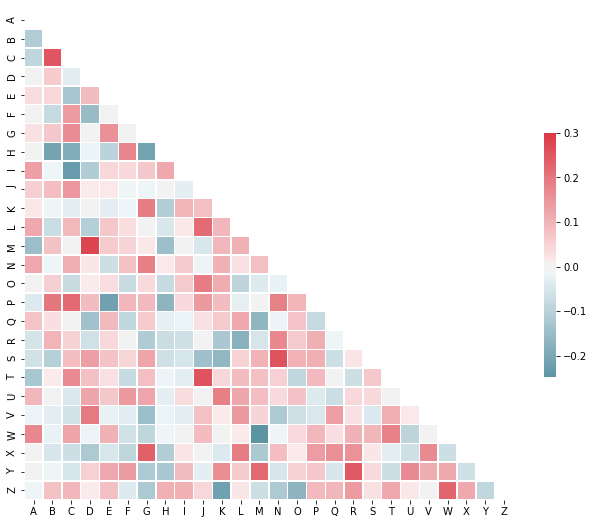

In [2]:
# 读取字母表
from string import ascii_letters

# Generate a large random dataset 生成数据集
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix 计算相关系数
corr = d.corr()

# Generate a mask for the upper triangle 生成掩模
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

d# Set up the matplotlib figure 设置图大小
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap 设置颜色
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# square表都是正方形
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 2. Scatterplot with marginal ticks(JointGrid)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


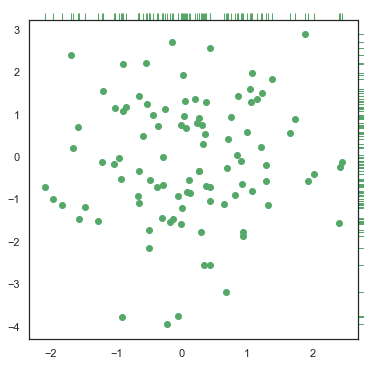

In [3]:
sns.set(style="white", color_codes=True)

# Generate a random bivariate dataset
rs = np.random.RandomState(9)
mean = [0, 0]
cov = [(1, 0), (0, 2)]
x, y = rs.multivariate_normal(mean, cov, 100).T

# Use JointGrid directly to draw a custom plot
# 创建一个绘图表格区域，设置好x,y对应数据
grid = sns.JointGrid(x, y, space=0, height=6, ratio=50)
# 在联合分布上画出散点图
grid.plot_joint(plt.scatter, color="g")
# 在边缘分布上再作图
grid.plot_marginals(sns.rugplot, height=1, color="g");

## 3. Multiple bivariate KDE plots(kdeplot)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


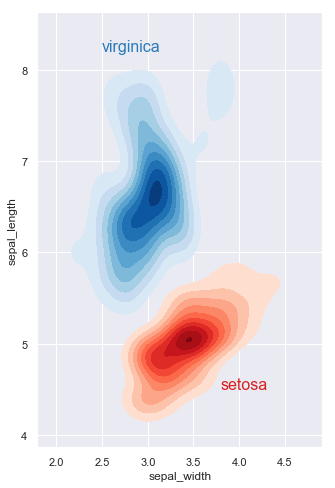

In [4]:
sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
# 单独筛选对应类的数据
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
# 设置轴的缩放比例，equal表示x,y轴同等缩放比例
ax.set_aspect("equal")

# Draw the two density plots
# 画核密度图
# shade表示添加阴影，shade_lowest表示两个核密度图相叠时，核密度小的部分不画出来
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
# 添加颜色
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red);

## 4. Multiple linear regression(lmplot)

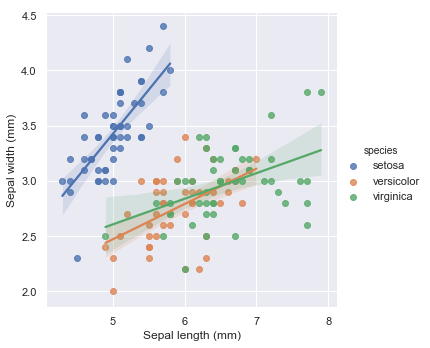

In [5]:
# Load the iris dataset 读取数据
iris = sns.load_dataset("iris")

# Plot sepal with as a function of sepal_length across days
# 画散点图，lmplot默认参数，以hue设定不同种类
# truncate为true表示现植回归拟合曲线绘图时只画出有数据的部分
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, height=5, data=iris);

# Use more informative axis labels than are provided by default
# 设置横竖坐标轴label
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)");

## 5. Paired density and scatterplot matrix(PairGrid)

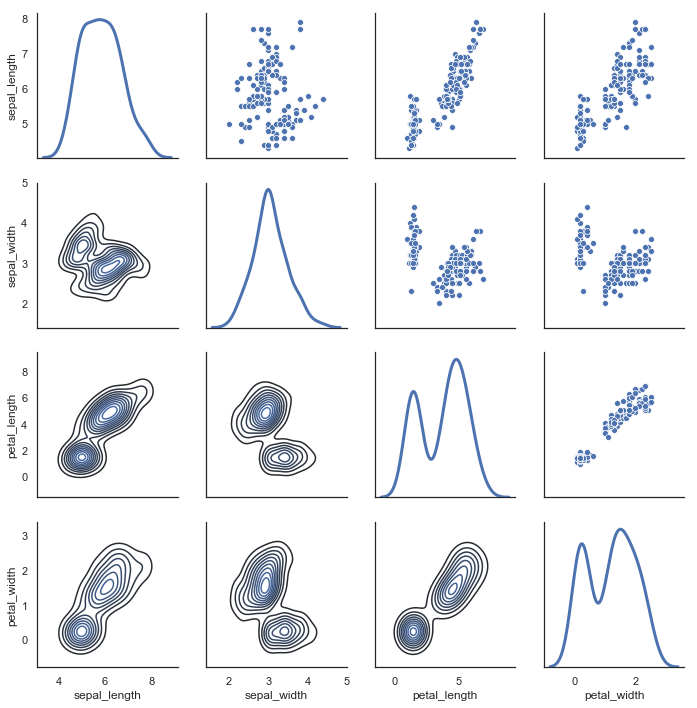

In [6]:
sns.set(style="white")

df = sns.load_dataset("iris")
# 制作散点图矩阵
# diag_sharey是否共享y轴
g = sns.PairGrid(df, diag_sharey=False)
# 下三角绘多变量核密度图
g.map_lower(sns.kdeplot)
# 上三角绘散点图
g.map_upper(sns.scatterplot)
# 对角线绘单变量核密度图，lw表示线条粗细
g.map_diag(sns.kdeplot, lw=3);

## 6. Paired categorical plots(PairGrid)

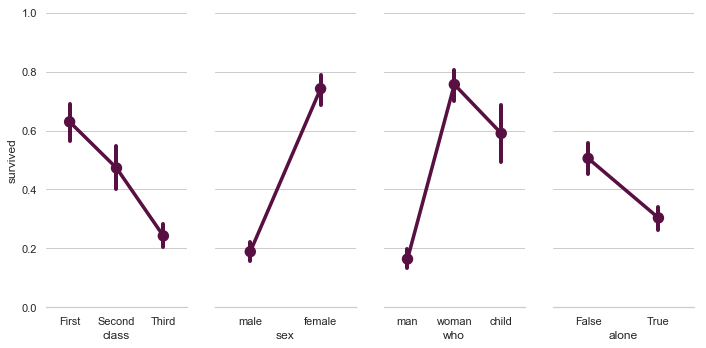

In [7]:
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
# 制作散点图矩阵
# y轴为survived值，x_vars设定x轴
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)
# Draw a seaborn pointplot onto each Axes
# 制作折线图, errwidth表示上下标准注的长度，其中各点代表平均值
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True);

## 7. Dot plot with several variables(PairGrid)

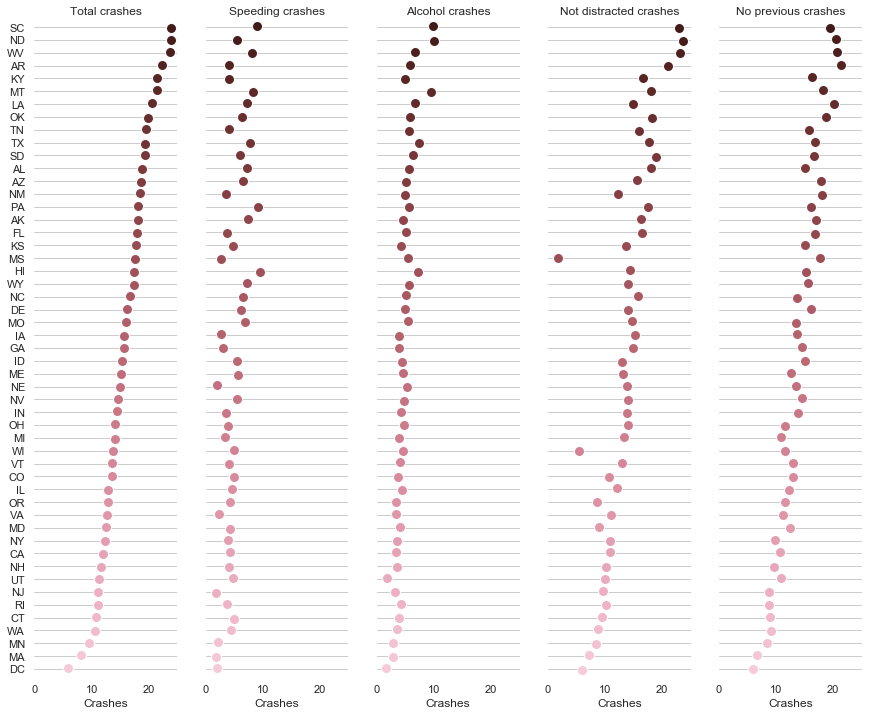

In [8]:
sns.set(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
# 按crash排序的值绘图，x_vars，y_vars表示x轴或者y轴
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)
# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")
# Use the same x axis limits on all columns and add better labels
# 设置x轴，x标签
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

#去除轴线
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True);

## 8. Plotting a three-way ANOVA(catplot)

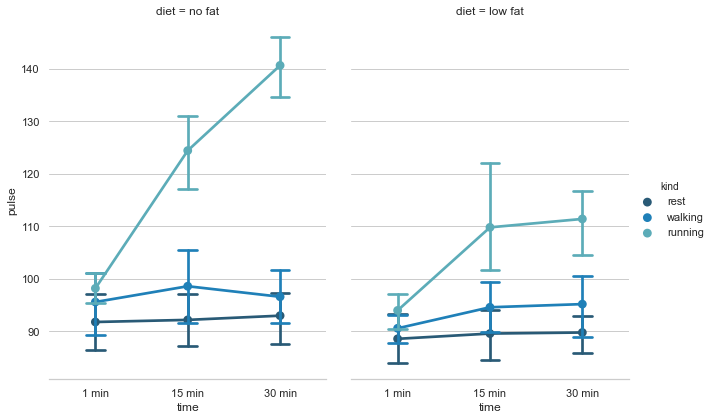

In [9]:
# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
# 分类型数据作坐标轴画图catplot,
# col表示用什么变量对图像在横坐标方向分列
# hue表示在单个维度上用某个变量区分;
# capsize表示延伸线的长度
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet",
                capsize=0.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True);

## 9. Linear regression with marginal distributions(jointplot)

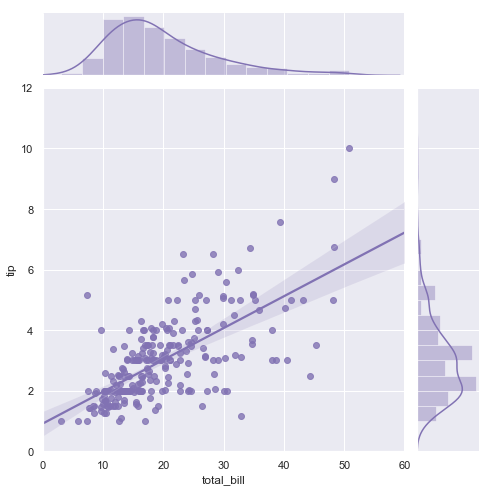

In [10]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
# 设置联合图像，类型是"reg"回归图
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)

## 10. Plotting model residuals(residplot)

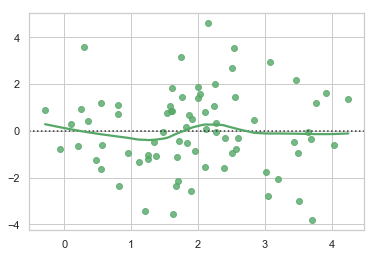

In [11]:
sns.set(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model 残差图
# 中间曲线为残差曲线((对比一阶拟合直线的残差)),lowess曲线平滑
sns.residplot(x, y, lowess=True, color="g");